In [1]:
'''
    RQ2: Relationship between Call Type and Chief Complaint and Impression
        Are there disagreements between call type and chief complaint? 
        Are there disagreements between chief complaint and impression?
        Any interesting or counter intuitive observations?
'''


#importing what we need
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import textwrap

In [2]:
data = pd.read_excel('RAA Data with Uniform CT & A,G,W & Uniform CC.xlsx')

data.head(2)

,Unnamed: 0,Unnamed: 0.1,ID,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Uniform Chief Complaints,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Priority,CallType,...,Current Medications,Assessment,Treatment,Transport,Exceptions/Extras,Signatures,Age,Gender,Weight,Weight Class
0,0,0,2020_2,0,0,{Flank Pain}{Shortness of Breath},0,0,1,Breathing Problems,...,"lisinopril (Prinivil), Regular Insulin, Human...","At 03:22, the patient was found. Initial asse...",Treatments were administered as follows: 03:2...,NaN,NaN,NaN,51 year,F,113 KG,obese
1,1,1,2020_3,1,1,{Dizziness}{Nausea }{Overdose/Poisoning/Alcoho...,1,1,1,Breathing Problems,...,bupropion (Wellbutrin).,"At 02:25, the patient was found. Initial asse...",Treatments were administered as follows: 02:2...,NaN,NaN,NaN,29 year,F,NaN,NaN


In [3]:
#read in grouped dictionaries

temp_ccs = pd.read_excel('GROUPED list of Chief Complaints.xlsx').set_index(['Grouping'])
grouped_ccs = {}
for group, row in temp_ccs.iterrows():
    cc = row['Unnamed: 1']
    grouped_ccs[cc] = group 
    
temp_imps = pd.read_excel('GROUPED Complied list of Impressions.xlsx').set_index(['Grouping'])
grouped_imps = {}
for group, row in temp_imps.iterrows():
    icd = row['ICD-10-CM']
    grouped_imps[icd] = group 
    
grouped_imps

{'F10.9': 'Substance Abuse',
 'F10.92': 'Substance Abuse',
 'F10.239': 'Substance Abuse',
 'F14': 'Substance Abuse',
 'F16': 'Substance Abuse',
 'F15': 'Substance Abuse',
 'F11': 'Substance Abuse',
 'F19': 'Substance Abuse',
 'F13': 'Substance Abuse',
 'F15.1': 'Substance Abuse',
 'T78.40': 'Anaphylaxis/Allergic Reaction',
 'R44.0': 'Behavioral/Psych Problems',
 'R44.1': 'Behavioral/Psych Problems',
 'R45.85': 'Behavioral/Psych Problems',
 'R45.5': 'Behavioral/Psych Problems',
 'R46.2': 'Behavioral/Psych Problems',
 'R45.6': 'Behavioral/Psych Problems',
 'F99': 'Behavioral/Psych Problems',
 'R45.851': 'Behavioral/Psych Problems',
 'T14.91': 'Behavioral/Psych Problems',
 'F41.9': 'Behavioral/Psych Problems',
 'R45.850': 'Behavioral/Psych Problems',
 'F32.9': 'Behavioral/Psych Problems',
 'L55.2': 'Burns',
 'L55.1': 'Burns',
 'L55.0': 'Burns',
 'T30.0': 'Burns',
 'T30': 'Burns',
 'I46.9': 'Cardiac Pain/Problems',
 'I49.9': 'Cardiac Pain/Problems',
 'I20.0': 'Cardiac Pain/Problems',
 'I20

In [4]:
#For all CTs, find frequencies of CCs

#define all impressions to look at 
ct_freqccs = {}

for index, row in data.iterrows():
    ct = row['CallType']
    
    #initialize the ct
    if ct not in ct_freqccs: ct_freqccs[ct] = {}
    
    #frequency of ccs
    ccs = row['Uniform Chief Complaints'][1:-1].split('}{')
    #print(ccs)
    for cc in ccs:
        try:
            cc = grouped_ccs[cc]
            
            if cc not in ct_freqccs[ct]: ct_freqccs[ct][cc] = 0
            ct_freqccs[ct][cc] += 1
        except TypeError:
            pass #skip if nan




In [5]:
ct_freqccs

{'Breathing Problems': {'Pain': 662,
  'Respiratory/Pulmonary Problem': 10174,
  'General/Other Illness': 1454,
  'Substance Abuse': 168,
  'Cardiac Pain/Problems': 968,
  'Musculoskeletal/Mobility': 96,
  'GI/GU': 69,
  'Injury/Trauma': 40,
  'Missing Complaint': 147,
  'Circulatory/Fluid Problems': 141,
  'Other': 91,
  'Altered Mental State': 338,
  'Anaphylaxis/Allergic Reaction': 68,
  'Endocrine/Metabolic/Nutritional': 42,
  'OBGYN/Pregnancy/Birth': 6,
  'Neurological Problem/Illness': 60,
  'Behavioral/Psych Problems': 145,
  'Infectious Diease/Symptoms': 48,
  'Enviroment-related Problems': 33,
  'Burns': 4,
  'Maltreatment/Assault/Rape': 1,
  'Transport': 4},
 'Falls': {'Injury/Trauma': 803,
  'Altered Mental State': 298,
  'General/Other Illness': 325,
  'Pain': 579,
  'Circulatory/Fluid Problems': 52,
  'GI/GU': 15,
  'Substance Abuse': 29,
  'Other': 25,
  'Neurological Problem/Illness': 42,
  'Respiratory/Pulmonary Problem': 77,
  'Endocrine/Metabolic/Nutritional': 33,
  '

In [6]:
#convert to table
#rows -> Call Type cols -> Chief Complaints
ct_freqccs_df = pd.DataFrame(0, index=ct_freqccs.keys(),columns=list(set(grouped_ccs.values())))

for call_type, freq_cc in ct_freqccs.items():
    for chief_comp, freq in freq_cc.items():
        ct_freqccs_df.at[call_type, chief_comp] += freq

ct_freqccs_df = ct_freqccs_df.drop('<None>').drop('Well Person Check')


In [7]:
ct_freqccs_df

,Anaphylaxis/Allergic Reaction,Endocrine/Metabolic/Nutritional,Behavioral/Psych Problems,Musculoskeletal/Mobility,Injury/Trauma,Maltreatment/Assault/Rape,Enviroment-related Problems,Pain,Other,Missing Complaint,...,GI/GU,OBGYN/Pregnancy/Birth,Cardiac Pain/Problems,Neurological Problem/Illness,Infectious Diease/Symptoms,General/Other Illness,Substance Abuse,Altered Mental State,Respiratory/Pulmonary Problem,Transport
Breathing Problems,68,42,145,96,40,1,33,662,91,147,...,69,6,968,60,48,1454,168,338,10174,4
Falls,11,33,5,16,803,0,5,579,25,40,...,15,2,52,42,4,325,29,298,77,1
Chest Pain,23,15,129,104,59,1,21,1316,92,150,...,81,2,4267,21,15,1090,153,93,1709,4
Stab/Gunshot Wound/Penetrating Trauma,4,0,2,2,436,0,0,32,6,8,...,0,0,8,1,0,5,2,25,25,0
Sick Person,49,122,90,114,84,2,30,968,184,132,...,202,8,443,136,51,2929,361,1121,958,9
Unconscious/Fainting/Near-Fainting,13,147,62,45,174,1,33,272,78,114,...,57,6,337,205,5,1195,584,2306,523,3
Traumatic Injury,0,1,0,2,183,0,5,134,6,9,...,0,0,7,4,0,43,2,18,8,0
Overdose/Poisoning/Ingestion,4,5,120,2,6,0,18,22,29,20,...,2,0,49,13,0,94,584,447,158,0
Convulsions/Seizure,4,52,43,26,47,0,5,55,13,39,...,5,0,50,1184,4,199,80,485,67,4
Cardiac Arrest/Death,2,4,6,0,7,0,0,8,10,19,...,1,0,310,13,1,21,108,142,106,0


Breathing Problems                       14755
Falls                                     2414
Chest Pain                                9413
Stab/Gunshot Wound/Penetrating Trauma      562
Sick Person                               8264
Unconscious/Fainting/Near-Fainting        6235
Traumatic Injury                           426
Overdose/Poisoning/Ingestion              1575
Convulsions/Seizure                       2369
Cardiac Arrest/Death                       759
Stroke/CVA                                1445
Transfer                                   740
Traffic/Transportation Incident           2013
Heart Problems/AICD                       1679
Abdominal Pain/Problems                   1319
Diabetic Problems                         1544
Unknown Problem/Person Down               1973
Headache                                   262
Allergic Reaction/Stings                   492
Hemorhage/Lacerations                     1359
Medical Alarm                              325
Psychiatric P

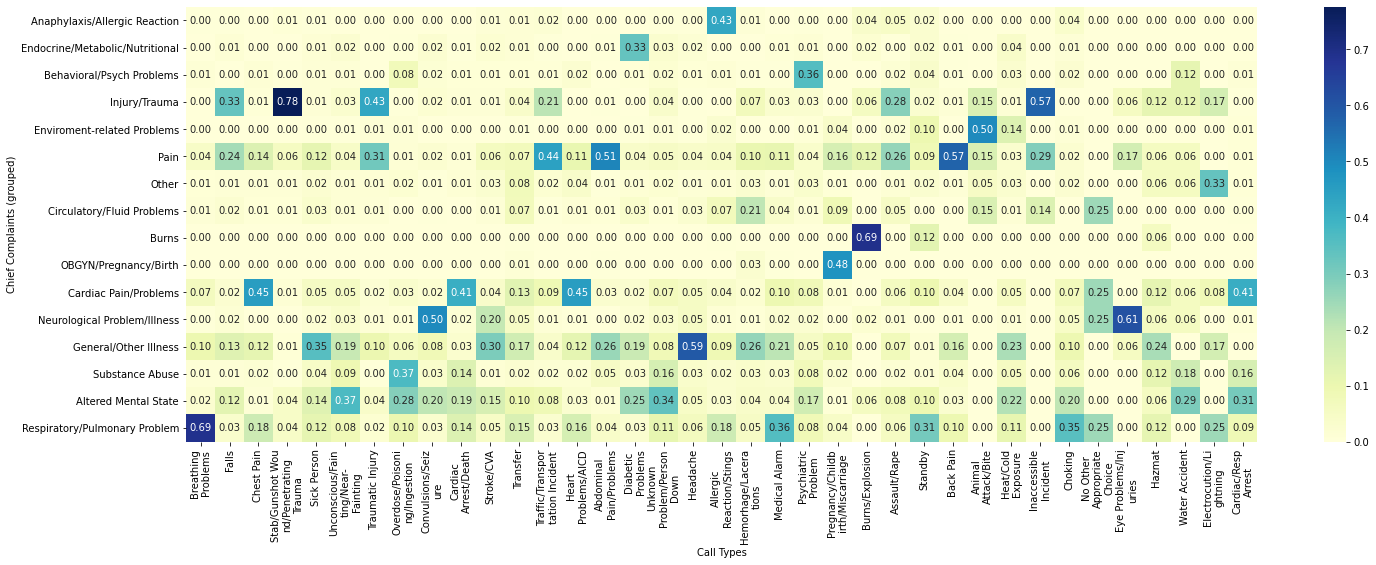

In [32]:
#convert table to freq
df = ct_freqccs_df.rename(index={
    'Industrial Accident/Inaccessible Incident/Other Entrapments (Non-Vehicle)': "Inaccessible Incident", 
    'Transfer/Interfacility/Palliative Care': "Transfer", 
    'Psychiatric Problem/Abnormal Behavior/Suicide Attempt': "Psychiatric Problem",
    'Carbon Monoxide/Hazmat/Inhalation/CBRN' : 'Hazmat',
    'Drowning/Diving/SCUBA Accident' : 'Water Accident' 
})

sums_row = df.sum(axis=1)
print(sums_row) #series

percent_ct_creqccs_df = df.T.divide(sums_row)

#plot heatmap
percent_ct_creqccs_df = percent_ct_creqccs_df[(percent_ct_creqccs_df.T > 0.15).any()]

fig, ax = plt.subplots(figsize=(24,8)) 
#x-> Call Type  y-> Chief Complaint
sns.heatmap(percent_ct_creqccs_df, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_xticklabels([textwrap.fill(e, 16) for e in percent_ct_creqccs_df.columns])

plt.xlabel("Call Types")
plt.ylabel("Chief Complaints (grouped)")
#Chief Complaints > 0.15, Transfer removed 
plt.show()

In [10]:
#For all Cheif Complaints s, find frequencies of impressions

import re

#define all impressions to look at 
cc_freqimps = {}

for index, row in data.iterrows():
    ccs = row['Uniform Chief Complaints'][1:-1].split('}{')
    try:
        imps = row['Impression'][1:-1].split('}{')
    except TypeError: #no impressions
        pass
    
    for cc in ccs:
        cc = grouped_ccs[cc]
        #initialize the cc
        if cc not in cc_freqimps: cc_freqimps[cc] = {}

        #frequency of imps
        for imp in imps:
            id_start, id_end = re.search(r'[A-Z][0-9]', imp).span()
            icd = imp[id_start:-1]
            imp_group = grouped_imps[icd]
            if imp_group not in cc_freqimps[cc]: cc_freqimps[cc][imp_group] = 0
            cc_freqimps[cc][imp_group] += 1
            

    

In [11]:
cc_freqimps

{'Pain': {'Pain': 5643,
  'Circulatory/Fluid Problems': 226,
  'Respiratory/Pulmonary Problem': 429,
  'Endocrine/Metabolic/Nutritional ': 199,
  'Injury/Trauma': 2866,
  'Examination no complaint': 157,
  'General/Other Illness Symptoms': 1451,
  'Behavioral/Psych Problems': 357,
  'Substance Abuse': 216,
  'Altered Mental State': 226,
  'Neurological Problem/Illness': 138,
  'Cardiac Pain/Problems': 1534,
  'GI/GU': 609,
  'Infectious Diease/Symptoms': 223,
  'OBGYN/Pregnancy/Birth': 70,
  'Foreign Body': 17,
  'Shock': 9,
  'Musculoskeletal/Mobility': 31,
  'Enviroment-related Problems': 22,
  'Anaphylaxis/Allergic Reaction': 24,
  'Burns': 18,
  'Maltreatment/Assault/Rape': 1},
 'Respiratory/Pulmonary Problem': {'Pain': 1766,
  'Circulatory/Fluid Problems': 593,
  'Respiratory/Pulmonary Problem': 18011,
  'Endocrine/Metabolic/Nutritional ': 289,
  'Substance Abuse': 924,
  'General/Other Illness Symptoms': 2520,
  'Examination no complaint': 406,
  'Infectious Diease/Symptoms': 138

In [12]:
#convert to table
#rows -> Chief Complaints cols -> Impression
cc_freqimps_df = pd.DataFrame(0, index=cc_freqimps.keys(),columns=list(set(grouped_imps.values())))

for chief_comp, freq_imp in cc_freqimps.items():
    for imp, freq in freq_imp.items():
        cc_freqimps_df.at[chief_comp, imp] += freq
        #print(imp,freq)


cc_freqimps_df

,Anaphylaxis/Allergic Reaction,Behavioral/Psych Problems,Musculoskeletal/Mobility,Injury/Trauma,Maltreatment/Assault/Rape,Foreign Body,Enviroment-related Problems,Pain,Circulatory/Fluid Problems,Burns,...,Cardiac Pain/Problems,Neurological Problem/Illness,General/Other Illness Symptoms,Infectious Diease/Symptoms,Examination no complaint,Newborn Care,Substance Abuse,Altered Mental State,Respiratory/Pulmonary Problem,Endocrine/Metabolic/Nutritional
Pain,24,357,31,2866,1,17,22,5643,226,18,...,1534,138,1451,223,157,0,216,226,429,199
Respiratory/Pulmonary Problem,129,1504,32,278,0,25,85,1766,593,0,...,3136,78,2520,1387,406,11,924,686,18011,289
General/Other Illness,54,516,74,396,0,7,108,2243,826,3,...,1236,735,7980,1331,293,0,453,994,1221,1043
Substance Abuse,19,377,9,55,2,0,288,301,56,0,...,156,54,1071,82,89,0,2079,871,409,120
Injury/Trauma,0,120,16,3506,2,4,13,636,63,10,...,140,125,377,21,90,0,167,436,55,52
Cardiac Pain/Problems,12,999,16,315,2,5,38,3504,311,3,...,7393,75,1279,309,314,0,417,197,1391,194
Altered Mental State,10,503,23,590,2,12,279,190,401,8,...,499,911,1274,441,204,0,2404,5966,609,1094
Neurological Problem/Illness,8,135,19,149,0,1,22,80,48,1,...,54,2414,508,26,67,0,182,807,33,68
Musculoskeletal/Mobility,12,118,13,30,0,0,11,206,36,0,...,96,115,334,67,43,0,33,28,86,63
Other,12,165,28,110,0,4,18,171,62,0,...,183,77,323,79,204,0,123,131,90,75


Pain                               14466
Respiratory/Pulmonary Problem      32062
General/Other Illness              21499
Substance Abuse                     6149
Injury/Trauma                       5861
Cardiac Pain/Problems              17057
Altered Mental State               15608
Neurological Problem/Illness        4648
Musculoskeletal/Mobility            1318
Other                               1909
GI/GU                               1603
OBGYN/Pregnancy/Birth                516
Endocrine/Metabolic/Nutritional     2193
Anaphylaxis/Allergic Reaction       1037
Missing Complaint                   1991
Circulatory/Fluid Problems          2569
Enviroment-related Problems          564
Behavioral/Psych Problems           2267
Infectious Diease/Symptoms           333
Transport                            211
Burns                                179
Maltreatment/Assault/Rape             13
dtype: int64
Index(['Anaphylaxis/Allergic Reaction', 'Behavioral/Psych Problems',
       'Injury/T

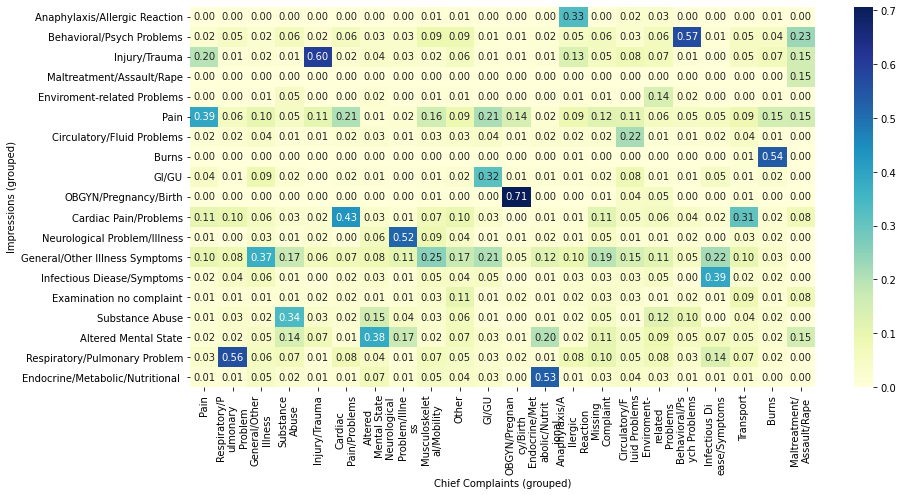

In [40]:
#convert table to freq
sums_row = cc_freqimps_df.sum(axis=1)
print(sums_row) #series

percent_cc_freqimps_df = cc_freqimps_df.T.divide(sums_row)
percent_cc_freqimps_df

percent_cc_freqimps_df = percent_cc_freqimps_df[(percent_cc_freqimps_df.T >= 0.05).any()]

print(percent_cc_freqimps_df.index)

#plot heatmap

fig, ax = plt.subplots(figsize=(14,7)) 
#x-> Chief Complaints  y-> Impressions
sns.heatmap(percent_cc_freqimps_df, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_xticklabels([textwrap.fill(e, 13) for e in percent_cc_freqimps_df.columns])

plt.xlabel("Chief Complaints (grouped)")
plt.ylabel("Impressions (grouped)")
#impressions >= 0.05
plt.show()